#  Exploratory Data Analysis (EDA) - Transport ML Project

##  Project Overview
- **Goal:** Battery Range & Health Prediction
- **Dataset:** https://www.kaggle.com/datasets/ziya07/adas-ev-dataset
- **Target Variable:** 

The data contains the following information:

- Vehicle Telemetry: Speed, acceleration, battery level, energy consumption.- 
Sensor Data: Obstacle distance, lane deviation, brake intensity, regenerative braking usag.- 
Environmental Factors: Weather conditions, traffic density, road type- .
Driver Behavior: Steering angle, reaction ti-me.me.

In [1]:
! pip install statsmodels

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

##  1. Data Preview
- Shape of the dataset (rows, columns)
- Data types and structure
- Sample rows (head and tail)

In [13]:
battery_data = pd.read_csv(r"D:\Protfolio_Projects\battery-health-prediction\Data\ADAS_EV_Dataset.csv")
battery_data.head()

,timestamp,speed_kmh,acceleration_mps2,brake_intensity,battery_level,energy_consumption,regen_braking_usage,lane_deviation,obstacle_distance,traffic_density,weather_condition,road_type,steering_angle,reaction_time,ADAS_output
0,2023-01-01 00:00:00,44.944814,-0.758155,0.729998,65.623734,0.667933,84.723658,0.966221,4.266110,41,Rainy,Highway,13.582336,2.094568,Brake
1,2023-01-01 00:00:01,114.085717,-1.002527,0.184512,48.632783,0.280154,49.451704,1.524408,82.850462,23,Foggy,Urban,-11.512973,2.318870,Lane Correct
2,2023-01-01 00:00:02,87.839273,-1.943077,0.346640,96.627360,0.340083,19.546561,-0.147280,24.930758,12,Rainy,Rural,-22.073883,2.128859,Maintain Speed
3,2023-01-01 00:00:03,71.839018,0.643600,0.663281,25.802953,0.443275,73.664179,-0.843285,28.393736,34,Sunny,Highway,-9.533481,0.497469,Maintain Speed
4,2023-01-01 00:00:04,18.722237,-0.140255,0.482089,60.846360,0.486941,41.867814,-0.724614,22.624528,15,Sunny,Urban,2.728121,0.959573,Accelerate


In [14]:
battery_data.shape

(10000, 15)

In [15]:
battery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            10000 non-null  object 
 1   speed_kmh            10000 non-null  float64
 2   acceleration_mps2    10000 non-null  float64
 3   brake_intensity      10000 non-null  float64
 4   battery_level        10000 non-null  float64
 5   energy_consumption   10000 non-null  float64
 6   regen_braking_usage  10000 non-null  float64
 7   lane_deviation       10000 non-null  float64
 8   obstacle_distance    10000 non-null  float64
 9   traffic_density      10000 non-null  int64  
 10  weather_condition    10000 non-null  object 
 11  road_type            10000 non-null  object 
 12  steering_angle       10000 non-null  float64
 13  reaction_time        10000 non-null  float64
 14  ADAS_output          10000 non-null  object 
dtypes: float64(10), int64(1), object(4)
m

##  2. Missing Values
- Count of missing values per column"
- Decision: Impute / Drop / Leave as-is

In [16]:
battery_data.isnull().sum()

timestamp              0
speed_kmh              0
acceleration_mps2      0
brake_intensity        0
battery_level          0
energy_consumption     0
regen_braking_usage    0
lane_deviation         0
obstacle_distance      0
traffic_density        0
weather_condition      0
road_type              0
steering_angle         0
reaction_time          0
ADAS_output            0
dtype: int64

- As there no null values we need not have to bother regarding the imputation 

##  3. Data Types and Conversions
- Identify categorical vs numerical features
- Any necessary type conversions?

In [17]:
battery_data.dtypes

timestamp               object
speed_kmh              float64
acceleration_mps2      float64
brake_intensity        float64
battery_level          float64
energy_consumption     float64
regen_braking_usage    float64
lane_deviation         float64
obstacle_distance      float64
traffic_density          int64
weather_condition       object
road_type               object
steering_angle         float64
reaction_time          float64
ADAS_output             object
dtype: object

- Data Type conversion is required from objectss to catogorical data type

In [19]:
cat_cols = ['weather_condition','road_type', 'ADAS_output']
for col in cat_cols:
    battery_data[col] = battery_data[col].astype('category')


In [23]:
battery_data['timestamp'] = pd.to_datetime(battery_data['timestamp'])

In [24]:
battery_data.dtypes

timestamp              datetime64[ns]
speed_kmh                     float64
acceleration_mps2             float64
brake_intensity               float64
battery_level                 float64
energy_consumption            float64
regen_braking_usage           float64
lane_deviation                float64
obstacle_distance             float64
traffic_density                 int64
weather_condition            category
road_type                    category
steering_angle                float64
reaction_time                 float64
ADAS_output                  category
dtype: object

##  4. Duplicates and Outliers
- Check for duplicate rows
- Initial look at outliers in numerical columns

In [25]:
battery_data.duplicated().sum()

0

- There are no duplicates in the dataset tom be handled

In [27]:
num_cols = battery_data.select_dtypes(include=['int64', 'float64']).columns

In [28]:
for col in num_cols:
    Q1 = battery_data[col].quantile(0.25)
    Q3 = battery_data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = battery_data[(battery_data[col] < lower_bound) | (battery_data[col] > upper_bound)]

    print(f"{col}: {len(outliers)} outliers")


speed_kmh: 0 outliers
acceleration_mps2: 0 outliers
brake_intensity: 0 outliers
battery_level: 0 outliers
energy_consumption: 0 outliers
regen_braking_usage: 0 outliers
lane_deviation: 0 outliers
obstacle_distance: 0 outliers
traffic_density: 0 outliers
steering_angle: 0 outliers
reaction_time: 0 outliers


- We can see that there is no outliers to be handled

##  5. Univariate Analysis
- Distribution of each numeric variable (histograms)
- Value counts of categorical variables (bar plots)
- Skewness / kurtosis of numerical columns


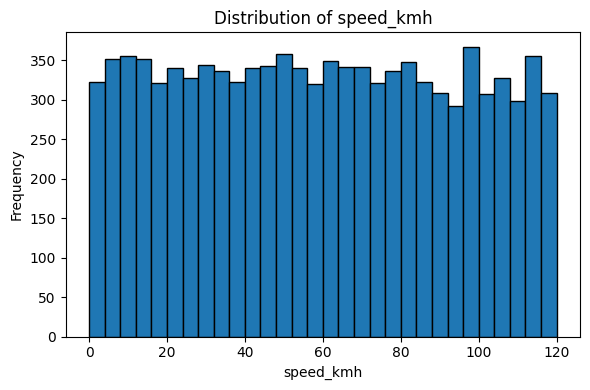

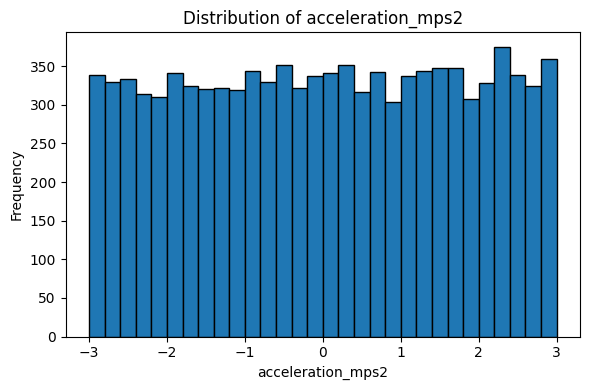

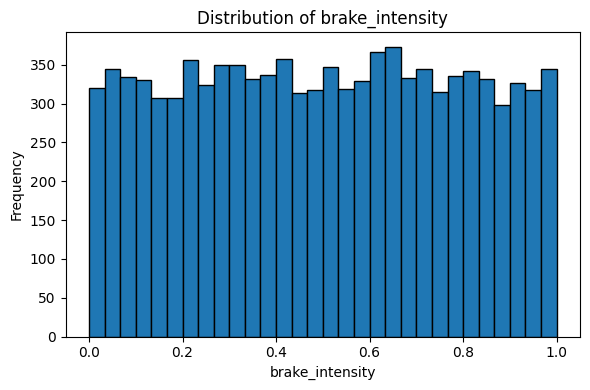

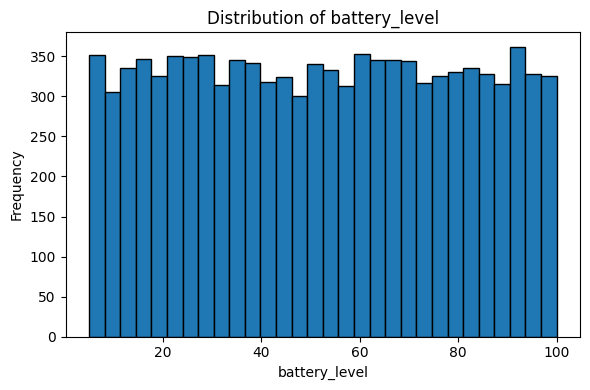

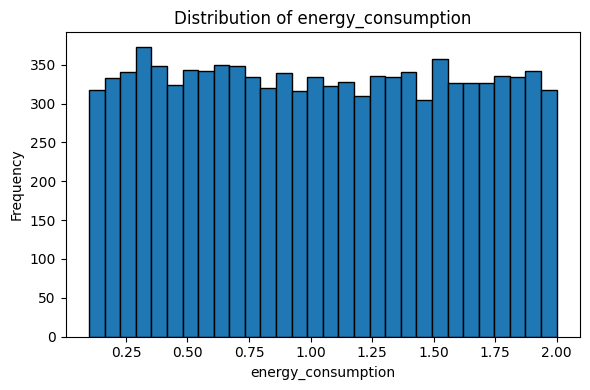

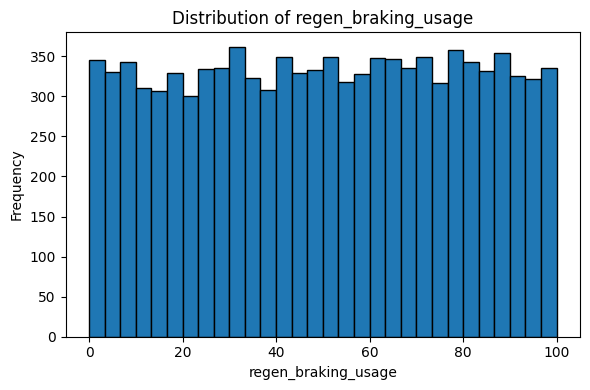

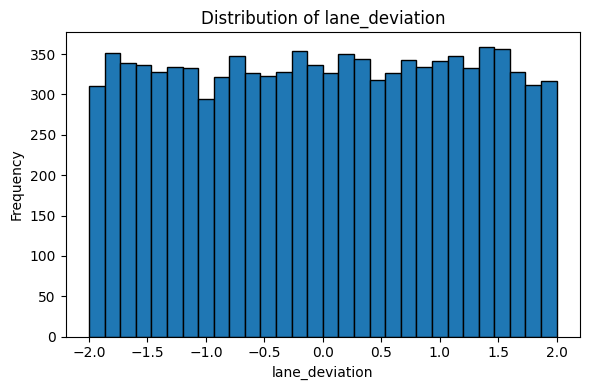

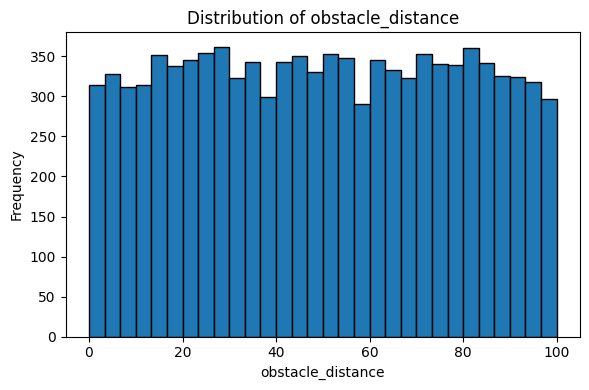

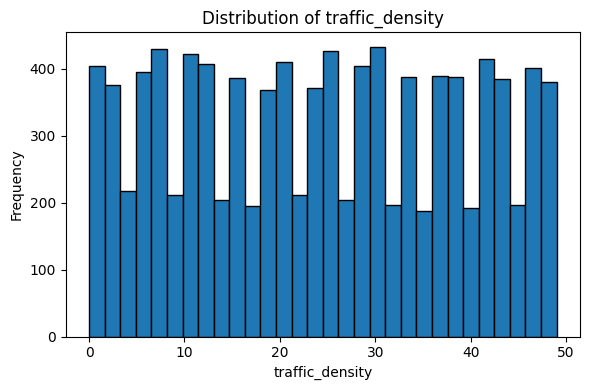

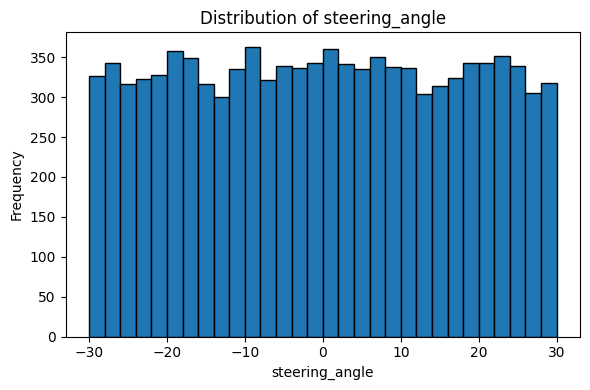

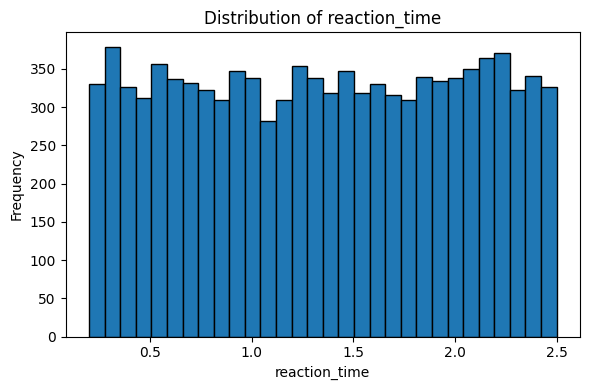

In [29]:
for col in num_cols:
    
    plt.figure(figsize=(6, 4))
    battery_data[col].hist(bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

###  ID Distribution
- IDs are fairly evenly distributed — no duplication or bias observed.

###  Customer Care Calls
- Most customers contacted customer care **4 times**.
- Indicates a potential threshold where more calls may signal delivery issues.

###  Customer Ratings
- Positive and negative ratings are **almost equally distributed**.
- Balanced ratings provide a good base for classification modeling.

### Cost of Product
- Product costs mostly cluster around **$250**.
- Represents a mid-range pricing segment; could influence discount strategies.

###  Prior Purchases
- Majority of customers have made **3 prior purchases**.
- A small group has made up to **10 purchases**, representing loyal or high-value customers.

###  Discount Offered
- Most discounts are **10% or below**. so consider 10 as threshold for is_high_discount
- High-discount scenarios are rare and may be valuable indicators of urgent promotions.

###  Product Weight
- Product weights mostly peak at **1000g** and **5000g**.
- May represent standardized package sizes or common product categories.

###  Delivery Status (Target Variable)
- Around **4500 shipments were delayed**.
- Over **6000 shipments reached on time**.
- The target is slightly imbalanced, but still within range for standard classification models.

In [20]:
cat_cols = battery_data.select_dtypes(include='category').columns.tolist()

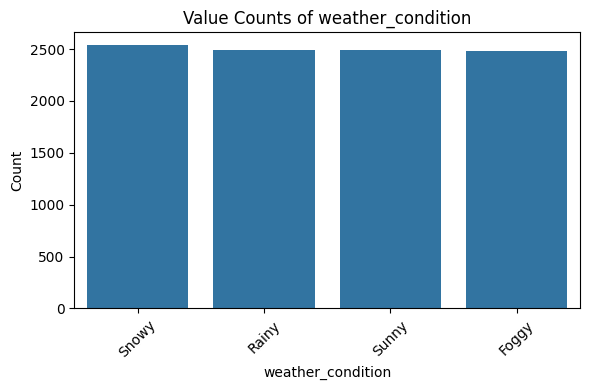

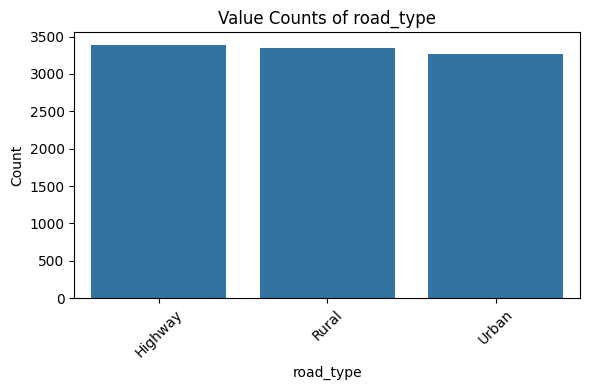

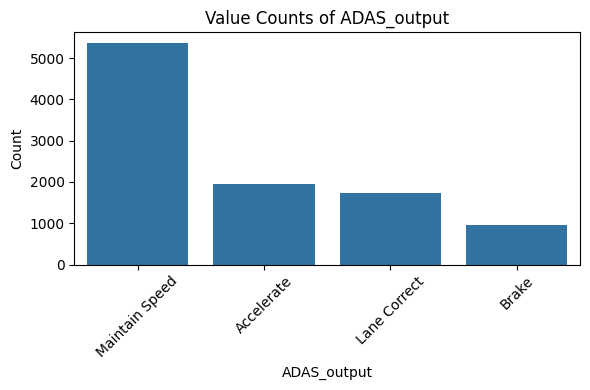

In [30]:
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=battery_data, x=col, order=battery_data[col].value_counts().index)
    plt.title(f'Value Counts of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Warehouse Block
- Most products are stored in **Warehouse F**
- **No products** from Warehouse E
- Remaining warehouses (A, B, C, D) have **equal product counts**

###  Mode of Shipment
- **Ship** is the most used shipping method
- **Road** and **Flight** shipments are equally used but less than Ship

###  Product Importance
- Most products are marked as **Low** or **Medium** importance
- **High importance products are rare**, may be a key signal for fast delivery

###  Gender
- **Equal representation** of Male and Female customers
- No gender bias in data — this is great for fairness in modeling

In [32]:
# Collect skewness & kurtosis in a list
summary = []
num_cols = battery_data.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    sk = skew(battery_data[col].dropna())
    kt = kurtosis(battery_data[col].dropna(), fisher=False)  # normal dist has kurtosis = 3
    summary.append({
        'Feature': col,
        'Skewness': round(sk, 2),
        'Kurtosis': round(kt, 2)
    })

# Convert to DataFrame
skew_kurt_df = pd.DataFrame(summary)

# Display the result
skew_kurt_df


,Feature,Skewness,Kurtosis
0,speed_kmh,0.02,1.81
1,acceleration_mps2,-0.02,1.80
2,brake_intensity,-0.00,1.82
3,battery_level,0.00,1.80
4,energy_consumption,0.02,1.79
5,regen_braking_usage,-0.02,1.81
6,lane_deviation,-0.02,1.80
7,obstacle_distance,0.00,1.80
8,traffic_density,0.02,1.80
9,steering_angle,0.00,1.81


In [33]:
for i, row in skew_kurt_df.iterrows():
    feature = row['Feature']
    skew_val = row['Skewness']
    kurt_val = row['Kurtosis']

    print(f"\n {feature}:")
    if abs(skew_val) > 1:
        print(" -  Highly skewed → consider transformation (log/sqrt)")
    elif 0.5 < abs(skew_val) <= 1:
        print(" -  Moderately skewed → optional transform")
    else:
        print(" -  Symmetric → no transform needed")

    if kurt_val > 3.5:
        print(" -  High kurtosis → watch for outliers")
    elif kurt_val < 2.5:
        print(" -  Flat distribution → fewer outliers")
    else:
        print(" -  Normal peakedness")



 speed_kmh:
 -  Symmetric → no transform needed
 -  Flat distribution → fewer outliers

 acceleration_mps2:
 -  Symmetric → no transform needed
 -  Flat distribution → fewer outliers

 brake_intensity:
 -  Symmetric → no transform needed
 -  Flat distribution → fewer outliers

 battery_level:
 -  Symmetric → no transform needed
 -  Flat distribution → fewer outliers

 energy_consumption:
 -  Symmetric → no transform needed
 -  Flat distribution → fewer outliers

 regen_braking_usage:
 -  Symmetric → no transform needed
 -  Flat distribution → fewer outliers

 lane_deviation:
 -  Symmetric → no transform needed
 -  Flat distribution → fewer outliers

 obstacle_distance:
 -  Symmetric → no transform needed
 -  Flat distribution → fewer outliers

 traffic_density:
 -  Symmetric → no transform needed
 -  Flat distribution → fewer outliers

 steering_angle:
 -  Symmetric → no transform needed
 -  Flat distribution → fewer outliers

 reaction_time:
 -  Symmetric → no transform needed
 -  Fl

- No Transformation required 

## 6. Bivariate Analysis
- Compare features to target (`Reached.on.Time_Y.N`)
- Numerical vs target: Box plots, violin plots
- Categorical vs target: Grouped bar charts


In [36]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=battery_data, x='Reached.on.Time_Y.N', y=col)
    plt.title(f'{col} vs Delivery Status')
    plt.xlabel('Reached on Time (0 = No, 1 = Yes)')
    plt.tight_layout()
    plt.show()

##  Feature vs Target (Reached.on.Time_Y.N) - Insights

###  Target Variable Distribution
- **6000–8000 shipments** did **not** reach on time
- Only **2000–4000 shipments** were delivered on time
- Indicates a **class imbalance** → important for model selection & metric choice (e.g., F1 score)

---

###  Customer Care Calls,  Ratings,  Cost,  Prior Purchases
- Boxplots show **similar distributions** between on-time and delayed shipments
- Suggests **low predictive power** individually
- May work better in **interaction with other features**

---

### Discount Offered
- When **discount is ≤ 10%**, most shipments **did not reach** on time
- Possible business logic: low-discount products have lower shipping priority or urgency

---

###  Weight in gms
- When **weight is around 1000g or 4000–5000g**, deliveries are **more likely to be delayed**
- Could indicate standard-sized, bulky packages or slow processing items

---

###  Price per Gram
- When **price per gram is ~0.05**, shipments **tend to be delayed**
- These might be **cheap, bulkier items** that are deprioritized during fulfillment

---

##  Takeaways for Feature Engineering & Modeling
- `Discount_offered` and `Weight_in_gms` have **clear influence on delivery**
- Consider **binning weights** and **flagging high-discount items**
- Build **interactions** like `discount * weight`, or `is_bulk_item`


In [25]:
# Delayed-prone bulk items
shipment_data['bulk_low_discount'] = ((shipment_data['Weight_in_gms'] > 3000) & (shipment_data['Discount_offered'] <= 10)).astype(int)

# Cheap items with poor delivery (low price_per_gram and low discount)
shipment_data['cheap_low_discount'] = ((shipment_data['price_per_gram'] <= 0.05) & (shipment_data['Discount_offered'] <= 10)).astype(int)

# Light-weight, loyal customers (faster processing?)
shipment_data['light_loyal'] = ((shipment_data['Weight_in_gms'] <= 1000) & (shipment_data['Prior_purchases'] >= 5)).astype(int)

# Weighted discount impact
shipment_data['discount_weight_interaction'] = shipment_data['Discount_offered'] * shipment_data['Weight_in_gms']

# Value concentration (cost per prior purchase)
shipment_data['value_loyalty_ratio'] = shipment_data['Cost_of_the_Product'] / (shipment_data['Prior_purchases'] + 1)

# Cost effectiveness: price per gram * prior purchases
shipment_data['purchase_influence'] = shipment_data['price_per_gram'] * shipment_data['Prior_purchases']


In [26]:
shipment_data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,...,is_loyal_customer,is_high_discount,calls_per_purchase,price_per_gram,bulk_low_discount,cheap_low_discount,light_loyal,discount_weight_interaction,value_loyalty_ratio,purchase_influence
0,1,D,Flight,4,2,177,3,low,F,44,...,0,1,1.00,0.14,0,0,0,54252,44.25,0.42
1,2,F,Flight,4,5,216,2,low,M,59,...,0,1,1.33,0.07,0,0,0,182192,72.00,0.14
2,3,A,Flight,2,2,183,4,low,M,48,...,0,1,0.40,0.05,0,0,0,161952,36.60,0.20
3,4,B,Flight,3,3,176,4,medium,M,10,...,0,1,0.60,0.15,0,0,0,11770,35.20,0.60
4,5,C,Flight,2,2,184,3,medium,F,46,...,0,1,0.50,0.07,0,0,0,114264,46.00,0.21


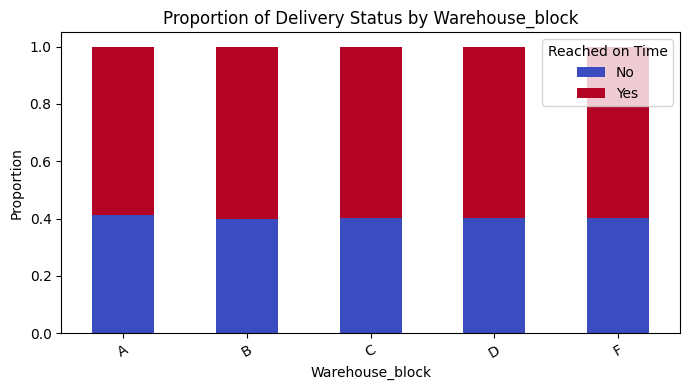

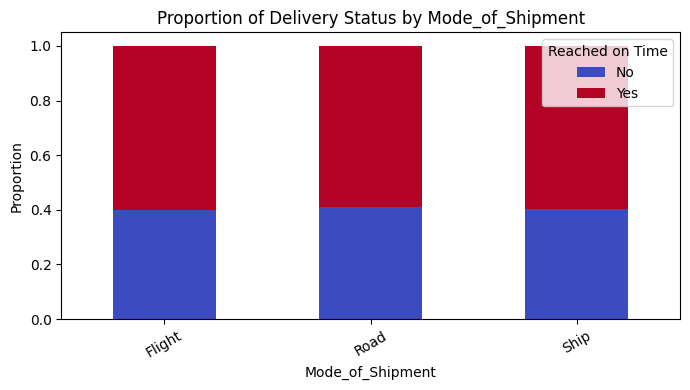

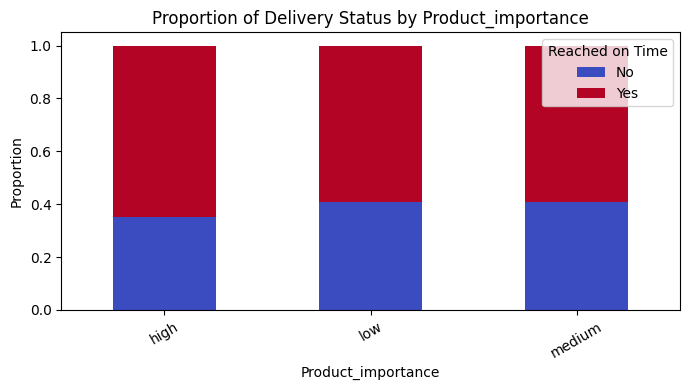

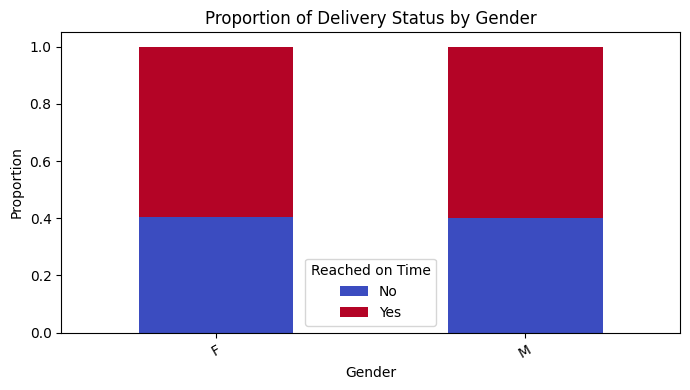

In [27]:
for col in cat_cols:
    # Create cross-tab of counts and normalize by row (i.e., each category)
    crosstab = pd.crosstab(shipment_data[col], shipment_data['Reached.on.Time_Y.N'], normalize='index')

    # Plot as normalized stacked bar chart
    crosstab.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(7, 4))

    plt.title(f'Proportion of Delivery Status by {col}')
    plt.ylabel('Proportion')
    plt.xlabel(col)
    plt.legend(title='Reached on Time', labels=['No', 'Yes'])
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

- No major insights as everything seems equal proportion

##  7. Correlation Matrix
- Heatmap of correlation between numerical features
- Note any multicollinearity concerns

In [28]:
num_cols = shipment_data.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = shipment_data[num_cols].corr().abs()
target_corr = corr_matrix['Reached.on.Time_Y.N'].sort_values(ascending=False)
print(target_corr)


Reached.on.Time_Y.N            1.000000
ID                             0.411822
Discount_offered               0.397108
discount_weight_interaction    0.309628
Weight_in_gms                  0.268793
price_per_gram                 0.087132
Cost_of_the_Product            0.073587
Customer_care_calls            0.067126
Prior_purchases                0.055515
Customer_rating                0.013119
purchase_influence             0.012199
value_loyalty_ratio            0.009571
calls_per_purchase             0.001145
Name: Reached.on.Time_Y.N, dtype: float64


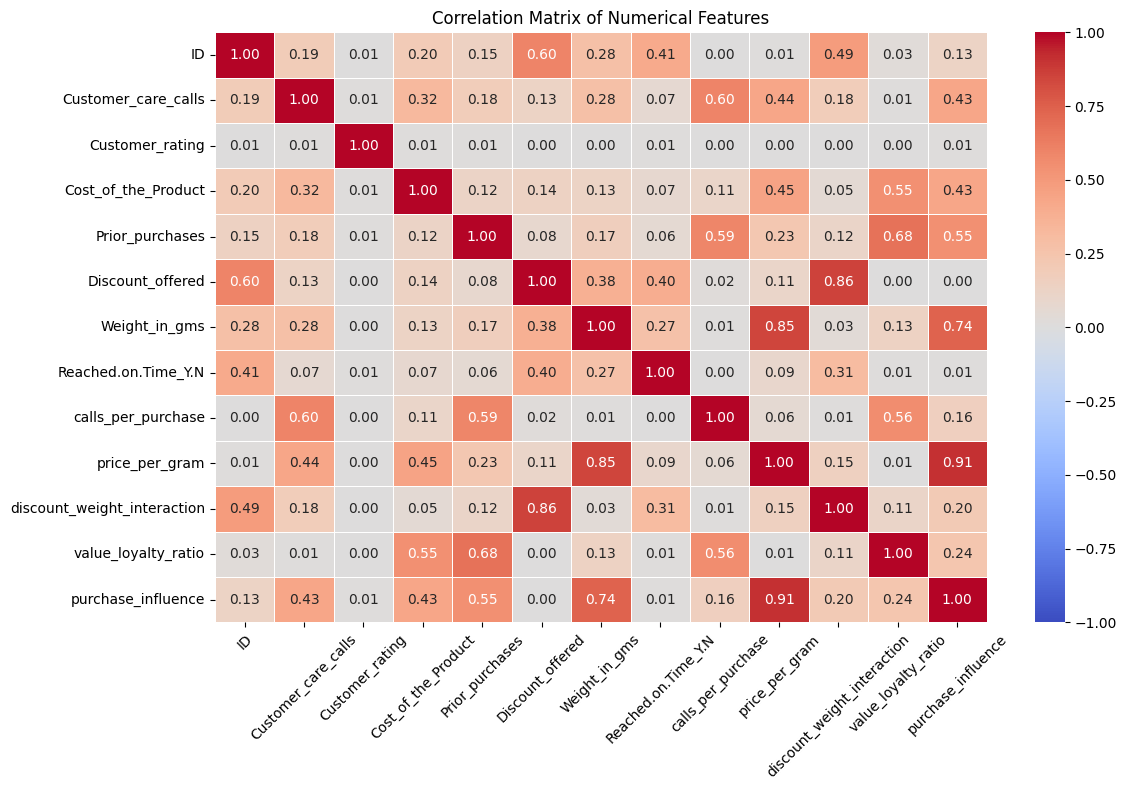

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            vmin=-1, vmax=1,
            linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



In [30]:

upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))


In [31]:
high_corr_pairs = [(col, row, upper_tri.loc[row, col]) 
                   for col in upper_tri.columns 
                   for row in upper_tri.index 
                   if (upper_tri.loc[row, col] > 0.8)]

# Show results
for col1, col2, corr_value in high_corr_pairs:
    print(f"{col1} ⬌ {col2} = {corr_value:.2f}")


price_per_gram ⬌ Weight_in_gms = 0.85
discount_weight_interaction ⬌ Discount_offered = 0.86
purchase_influence ⬌ price_per_gram = 0.91


In [32]:
X = shipment_data[num_cols].drop(columns=['Reached.on.Time_Y.N'])  # exclude target
X = add_constant(X)  # for intercept

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values(by='VIF', ascending=False))


                        Feature         VIF
0                         const  151.710903
9                price_per_gram   28.926930
12           purchase_influence   25.777236
11          value_loyalty_ratio   19.278125
8            calls_per_purchase   18.383440
2           Customer_care_calls   13.760015
4           Cost_of_the_Product   11.883574
6              Discount_offered    9.025584
7                 Weight_in_gms    8.319327
5               Prior_purchases    8.077517
10  discount_weight_interaction    7.134570
1                            ID    1.874248
3               Customer_rating    1.000585


- All the hihgly correlated ones are feature engineered ones

In [39]:
# Save
shipment_data.to_pickle(r"D:\transport-ml-delays\data\processed\shipment_cleaned.pkl")